In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

#X, y = make_circles(200, factor=0.3, noise=0.1)

X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

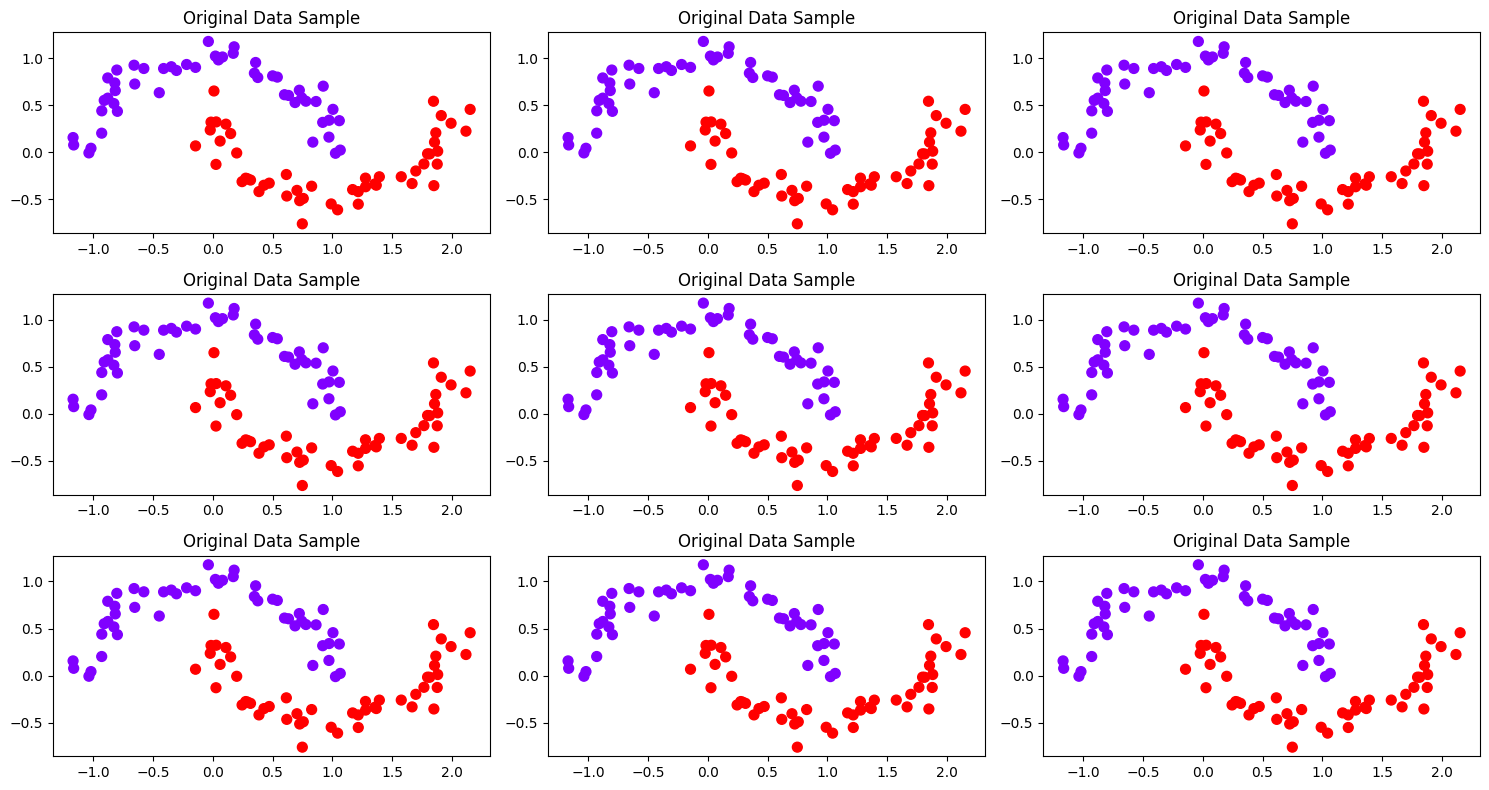

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 8), tight_layout=True)
axL = axes.ravel()

# 绘制样本图
for ax in axL:
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
    ax.set_title('Original Data Sample')

plt.show()

In [21]:
def plot_svc_decision_function(model, ax=None, tlabel=None):
    if ax is None:
        ax = plt.gca()  # 获得当前子图
    xlim = ax.get_xlim()  # 获得当前x轴限制
    ylim = ax.get_ylim()
    t_x = np.linspace(xlim[0], xlim[1], 30)
    t_y = np.linspace(ylim[0], ylim[1], 30)
    t_Y, t_X = np.meshgrid(t_y, t_x)
    xy = np.vstack([t_X.ravel(), t_Y.ravel()]).T  # 获得所有样本点的坐标
    P = model.decision_function(xy).reshape(t_X.shape)  # 获得所有样本点到决策边界的距离，并作为等高线的高度
    ax.set_title(tlabel, fontsize=10)
    # 绘制等高线
    ax.contour(t_X, t_Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [22]:
def plot_3D(elev=30, azim=30, X=X,y=y,r=r):
    #构建三维坐标
    ax = plt.subplot(projection="3d") #绘制三维原始样本的散点图
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

In [23]:
# 创建SVC（kernel="linear"）模型并训练
svc_model_linear = SVC(kernel="linear")
svc_model_linear.fit(X, y)

# 绘制决策边界
plot_svc_decision_function(svc_model_linear, axL[0], "SVC (linear)")

# 用score()方法对分类结果进行评估
score = svc_model_linear.score(X, y)
print("SVC (linear) 模型的分类准确率：", score)

SVC (linear) 模型的分类准确率： 0.87


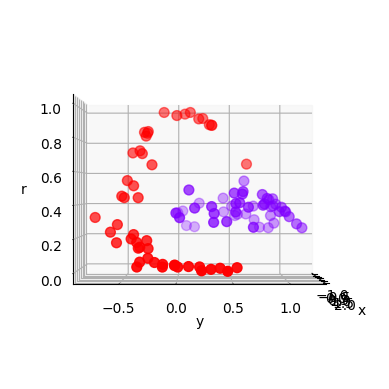

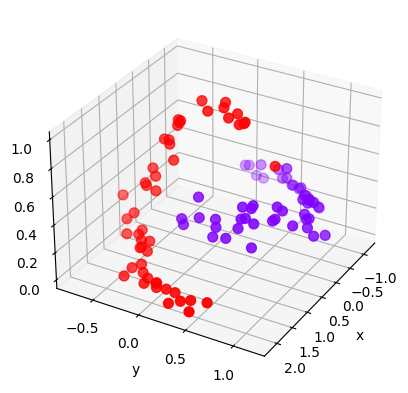

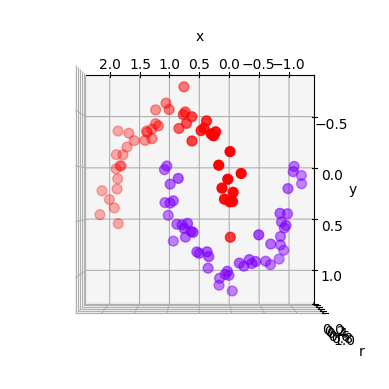

In [24]:
# 扩展数据维度
r = np.exp(-(X ** 2).sum(1))

# 调用 plot_3D 函数进行可视化
plot_3D(elev=0, azim=0, X=X, y=y, r=r)
plot_3D(elev=30, azim=30, X=X, y=y, r=r)
plot_3D(elev=90, azim=90, X=X, y=y, r=r)

In [25]:
# 创建Pipeline模型
model = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, max_iter=5000))
])

# 训练模型
model.fit(X, y)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, max_iter=5000))])

In [26]:
# 创建SVC模型
svc_model_rbf = SVC(kernel="rbf")  # RBF核函数
svc_model_rbf.fit(X, y)

svc_model_poly = SVC(kernel="poly", degree=3)  # 多项式核函数，设置degree为3
svc_model_poly.fit(X, y)

svc_model_sigmoid = SVC(kernel="sigmoid")  # s型核函数
svc_model_sigmoid.fit(X, y)

# 创建NuSVC模型
nusvc_model_rbf = NuSVC(kernel="rbf")
nusvc_model_rbf.fit(X, y)

nusvc_model_poly = NuSVC(kernel="poly", degree=3)
nusvc_model_poly.fit(X, y)

nusvc_model_sigmoid = NuSVC(kernel="sigmoid")
nusvc_model_sigmoid.fit(X, y)

NuSVC(kernel='sigmoid')

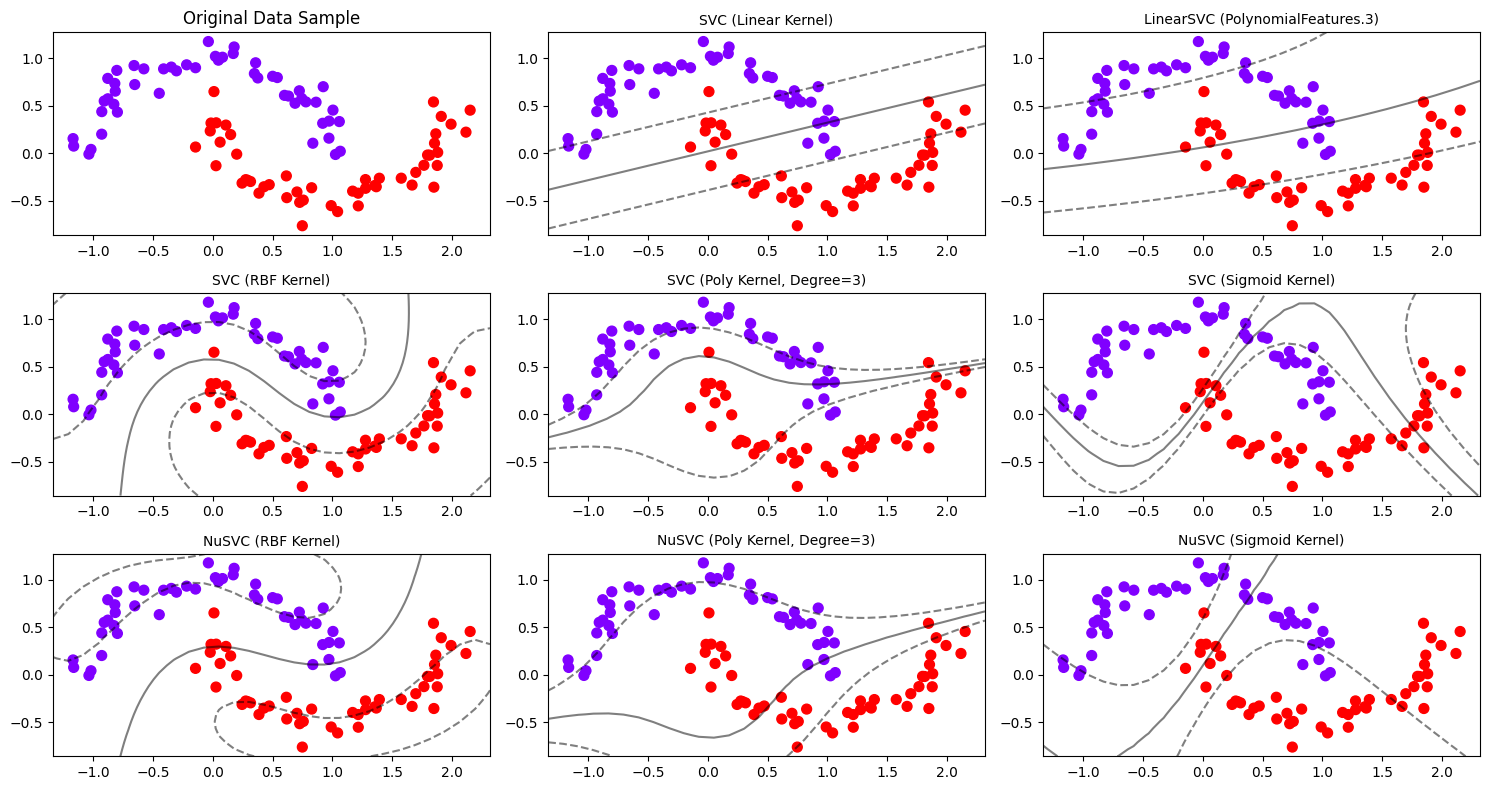

In [27]:
# 创建子图和标题
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
axL = axes.ravel()
titles = ['LinearSVC', 'SVC (rbf)', 'SVC (poly)', 'SVC (sigmoid)', 'NuSVC (rbf)', 'NuSVC (poly)', 'NuSVC (sigmoid)']

# 绘制样本图
for ax in axL:
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    ax.set_title('Original Data Sample')

# 绘制决策边界图
plot_svc_decision_function(svc_model_linear, axL[1], "SVC (Linear Kernel)")
plot_svc_decision_function(model, axL[2], "LinearSVC (PolynomialFeatures.3)")
plot_svc_decision_function(svc_model_rbf, axL[3], "SVC (RBF Kernel)")
plot_svc_decision_function(svc_model_poly, axL[4], "SVC (Poly Kernel, Degree=3)")
plot_svc_decision_function(svc_model_sigmoid, axL[5], "SVC (Sigmoid Kernel)")
plot_svc_decision_function(nusvc_model_rbf, axL[6], "NuSVC (RBF Kernel)")
plot_svc_decision_function(nusvc_model_poly, axL[7], "NuSVC (Poly Kernel, Degree=3)")
plot_svc_decision_function(nusvc_model_sigmoid, axL[8], "NuSVC (Sigmoid Kernel)")

plt.tight_layout()
plt.show()